# ETL Credits:

### Libreries

In [1]:
import pandas as pd
import ast
import missingno as msno
import json


### Opening CSV Credits data:

In [2]:
df_credits_csv = pd.read_csv('D:\Data Scientist\CURSADO HENRY DTS09\PI\PI1_PT02\PI_ML_OPS_PT02\Datasets\Credits_datasets\Csvs Credits\credits_1.csv')

In [3]:
df_credits_csv.head(1)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862


### Vamos a tener que explorarlo mas al apestoso csv credits 🤧

In [4]:
df_credits_csv.shape

(45476, 3)

In [5]:
df_credits_csv = df_credits_csv.drop_duplicates()

In [6]:
df_credits_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45439 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45439 non-null  object
 1   crew    45439 non-null  object
 2   id      45439 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


elimino la ultima fila que esta vacia

In [7]:
df_credits_csv = df_credits_csv.drop(df_credits_csv.index[-1])

### Separo la columna id y la guardo aparte para asegurarla, debido a que parece estar ok

In [8]:
df_movie_credits_id = pd.DataFrame()
df_movie_credits_id['id']= df_credits_csv['id']
df_movie_credits_id = df_movie_credits_id.drop_duplicates()
print(type(df_movie_credits_id))

<class 'pandas.core.frame.DataFrame'>


### Continuo Explorando las dos primeras columnas, cast y crew

#### Cast:

In [9]:
df_credits_cast = df_credits_csv[['cast','id']]

print(df_credits_cast)

                                                    cast      id
0      [{'cast_id': 14, 'character': 'Woody (voice)',...     862
1      [{'cast_id': 1, 'character': 'Alan Parrish', '...    8844
2      [{'cast_id': 2, 'character': 'Max Goldman', 'c...   15602
3      [{'cast_id': 1, 'character': "Savannah 'Vannah...   31357
4      [{'cast_id': 1, 'character': 'George Banks', '...   11862
...                                                  ...     ...
45470  [{'cast_id': 1, 'character': 'Sir Robert Hode'...   30840
45471  [{'cast_id': 0, 'character': '', 'credit_id': ...  439050
45472  [{'cast_id': 1002, 'character': 'Sister Angela...  111109
45473  [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...   67758
45474  [{'cast_id': 2, 'character': '', 'credit_id': ...  227506

[45438 rows x 2 columns]


In [10]:
df_credits_cast = df_credits_cast.drop_duplicates()

In [11]:
print(df_credits_cast.iloc[1:2])

                                                cast    id
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...  8844


In [12]:
iteracion = 0
df_cast_cleaned = pd.DataFrame()

# Iterar a través de la columna 'cast' en df_credits_cast
for row in df_credits_cast['cast']:
    try:
        # Utilizar json.loads para convertir la representación de cadena en una lista de diccionarios
        list_of_dicts = json.loads(row.replace("'", "\""))

        # Verificar si el 'id' de la película existe en la columna 'id' de df_movie_credits_id
        if df_movie_credits_id['id'].isin([d['id'] for d in list_of_dicts]).any():
            # Crear el DataFrame con los datos del cast
            cast_df = pd.DataFrame(list_of_dicts)

            # Obtener el 'id' de la película de df_movie_credits_id
            movie_id = df_movie_credits_id['id'].iloc[iteracion]

            # Agregar el 'movie_id' al DataFrame cast_df
            cast_df['movie_id'] = movie_id

            # Unificar los DataFrames utilizando concat
            df_cast_cleaned = pd.concat([df_cast_cleaned, cast_df], ignore_index=True)

            # Incrementar el contador de iteración
            iteracion += 1
        else:
            # Si el 'id' de la película no existe en df_movie_credits_id, omitimos esta película
            pass
    except json.JSONDecodeError:
        # Omitir las filas que no se pueden decodificar como JSON
        pass


In [13]:
cast_df

,cast_id,character,credit_id,gender,id,name,order,profile_path,movie_id
0,1,Sir Robert Hode,52fe44439251416c9100a887,2,29459,Patrick Bergin,0,/mxFum2Fr5YWD6kDQYb5u7EEvuva.jpg,111815
1,2,Maid Marian,52fe44439251416c9100a88b,1,139,Uma Thurman,1,/6SuOc2R7kXjq3Em24KTNDW9qblJ.jpg,111815
2,3,Little John,52fe44439251416c9100a88f,2,18616,David Morrissey,2,/y8L9zlrIzsAwu2Hufol6KqoDS4I.jpg,111815
3,4,Sir Miles Folcanet,52fe44439251416c9100a893,2,920,Jürgen Prochnow,3,/aar3n9NEQdwWVvPOne3kLLXm75N.jpg,111815
4,14,Baron Roger Daguerre,58207d0d92514168ad013b03,0,1924,Jeroen Krabbé,4,/A5Mks6zi6Xzt9A8fxBWc3wdlvhx.jpg,111815


In [14]:
df_cast_cleaned.shape

(53558, 9)

In [15]:
df_cast_cleaned

,cast_id,character,credit_id,gender,id,name,order,profile_path,movie_id
0,2,Max Goldman,52fe466a9251416c75077a8d,2,6837,Walter Matthau,0,/xJVkvprOnzP5Zdh5y63y8HHniDZ.jpg,862
1,3,John Gustafson,52fe466a9251416c75077a91,2,3151,Jack Lemmon,1,/chZmNRYMtqkiDlatprGDH4BzGqG.jpg,862
2,4,Ariel Gustafson,52fe466a9251416c75077a95,1,13567,Ann-Margret,2,/jx5lTaJ5VXZHYB52gaOTAZ9STZk.jpg,862
3,5,Maria Sophia Coletta Ragetti,52fe466a9251416c75077a99,1,16757,Sophia Loren,3,/emKLhbji1c7BjcA2DdbWf0EP9zH.jpg,862
4,6,Melanie Gustafson,52fe466a9251416c75077a9d,1,589,Daryl Hannah,4,/4LLmp6AQdlj6ueGCRbVRSGvvFSt.jpg,862
...,...,...,...,...,...,...,...,...,...
53553,1,Sir Robert Hode,52fe44439251416c9100a887,2,29459,Patrick Bergin,0,/mxFum2Fr5YWD6kDQYb5u7EEvuva.jpg,111815
53554,2,Maid Marian,52fe44439251416c9100a88b,1,139,Uma Thurman,1,/6SuOc2R7kXjq3Em24KTNDW9qblJ.jpg,111815
53555,3,Little John,52fe44439251416c9100a88f,2,18616,David Morrissey,2,/y8L9zlrIzsAwu2Hufol6KqoDS4I.jpg,111815
53556,4,Sir Miles Folcanet,52fe44439251416c9100a893,2,920,Jürgen Prochnow,3,/aar3n9NEQdwWVvPOne3kLLXm75N.jpg,111815


In [16]:
df_cast_cleaned = df_cast_cleaned.drop(columns=['gender','profile_path','order','character','credit_id','name'])

In [17]:
df_cast_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53558 entries, 0 to 53557
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   cast_id   53558 non-null  int64
 1   id        53558 non-null  int64
 2   movie_id  53558 non-null  int64
dtypes: int64(3)
memory usage: 1.2 MB


##### Guardo pickle: df_cast

In [18]:
# Guardar el DataFrame en formato pickle
df_cast_cleaned.to_pickle('../../Datasets Cleaned & light/df_cast.pkl')

##### Confirmacion de Diector id:

In [19]:
# Filtrar el DataFrame por el valor 138 en la columna "id"
df_filtrado = df_cast_cleaned[df_cast_cleaned["id"] == 138].copy()


In [20]:
df_filtrado.tail(50)

,cast_id,id,movie_id
405,5,138,35196
1233,13,138,27793
1330,10,138,9302
2818,6,138,109
5273,25,138,319
9831,7,138,454
14458,3,138,10351
16048,30,138,36568
16333,14,138,47881
17558,1001,138,11485


#### Crew:

In [21]:
df_credits_crew = df_credits_csv[['crew','id']]

print(df_credits_crew)

                                                    crew      id
0      [{'credit_id': '52fe4284c3a36847f8024f49', 'de...     862
1      [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...    8844
2      [{'credit_id': '52fe466a9251416c75077a89', 'de...   15602
3      [{'credit_id': '52fe44779251416c91011acb', 'de...   31357
4      [{'credit_id': '52fe44959251416c75039ed7', 'de...   11862
...                                                  ...     ...
45470  [{'credit_id': '52fe44439251416c9100a899', 'de...   30840
45471  [{'credit_id': '5894a97d925141426c00818c', 'de...  439050
45472  [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...  111109
45473  [{'credit_id': '52fe4776c3a368484e0c8387', 'de...   67758
45474  [{'credit_id': '533bccebc3a36844cf0011a7', 'de...  227506

[45438 rows x 2 columns]


In [22]:
df_credits_cast = df_credits_cast.drop_duplicates()

In [23]:
iteracion = 0
df_crew_cleaned = pd.DataFrame()

# Iterar a través de la columna 'cast' en df_credits_cast
for row in df_credits_crew['crew']:
    try:
        # Utilizar json.loads para convertir la representación de cadena en una lista de diccionarios
        list_of_dicts = json.loads(row.replace("'", "\""))

        # Verificar si el 'id' de la película existe en la columna 'id' de df_movie_credits_id
        if df_movie_credits_id['id'].isin([d['id'] for d in list_of_dicts]).any():
            # Crear el DataFrame con los datos del cast
            crew_df = pd.DataFrame(list_of_dicts)

            # Obtener el 'id' de la película de df_movie_credits_id
            movie_id = df_movie_credits_id['id'].iloc[iteracion]

            # Agregar el 'movie_id' al DataFrame cast_df
            crew_df['movie_id'] = movie_id

            # Unificar los DataFrames utilizando concat
            df_crew_cleaned = pd.concat([df_crew_cleaned, crew_df], ignore_index=True)

            # Incrementar el contador de iteración
            iteracion += 1
        else:
            # Si el 'id' de la película no existe en df_movie_credits_id, omitimos esta película
            pass
    except json.JSONDecodeError:
        # Omitir las filas que no se pueden decodificar como JSON
        pass


In [24]:
crew_df

,credit_id,department,gender,id,job,name,profile_path,movie_id
0,5330178a9251413a720055e3,Writing,2,20875,Novel,Leo Tolstoy,/9aao2Es6ciI1LmGPH7ZptPfS7fK.jpg,266022
1,52fe475bc3a368484e0c2a87,Writing,2,24279,Screenplay,Paolo Taviani,/su9WmmAKq43ICIFxRlbAQIE3qwQ.jpg,266022
2,52fe475bc3a368484e0c2a7b,Directing,2,24279,Director,Paolo Taviani,/su9WmmAKq43ICIFxRlbAQIE3qwQ.jpg,266022
3,52fe475bc3a368484e0c2a81,Directing,0,24281,Director,Vittorio Taviani,/m6LbjdSX1gBkckAHxtvM4TSESsy.jpg,266022


In [25]:
df_crew_cleaned.shape

(2789, 8)

In [26]:
df_crew_cleaned = df_crew_cleaned.drop(columns=['gender','profile_path','credit_id'])

In [27]:
df_crew_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   department  2789 non-null   object
 1   id          2789 non-null   int64 
 2   job         2789 non-null   object
 3   name        2789 non-null   object
 4   movie_id    2789 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 109.1+ KB


##### Guardo pickle: df_crew

In [28]:
# Guardar el DataFrame en formato pickle
df_crew_cleaned.to_pickle('../../Datasets Cleaned & light/df_crew.pkl')

#### No todas las movies poseen un mismo director...:

In [29]:
# Crear un diccionario para almacenar la cantidad de directores por movie_id
directores_por_movie_id = {}

# Recorrer el dataframe y contar los directores para cada movie_id
for index, row in df_crew_cleaned.iterrows():
    if row['job'] == 'Director':
        movie_id = row['movie_id']
        directores_por_movie_id[movie_id] = directores_por_movie_id.get(movie_id, 0) + 1

# Verificar si hay movie_id con más de dos directores
for movie_id, num_directores in directores_por_movie_id.items():
    if num_directores > 2:
        print(f"El movie_id {movie_id} tiene {num_directores} directores.")


El movie_id 13701 tiene 4 directores.
El movie_id 10731 tiene 3 directores.
El movie_id 49803 tiene 7 directores.
El movie_id 507 tiene 8 directores.
El movie_id 812 tiene 3 directores.
El movie_id 117730 tiene 3 directores.
El movie_id 44535 tiene 9 directores.
El movie_id 804 tiene 3 directores.
El movie_id 54405 tiene 3 directores.
El movie_id 756 tiene 3 directores.


#### Listado unico de job == Director ; directors_df 

In [30]:
# Filtrar el DataFrame original para obtener solo las filas con la categoría "Director"
directors_df = df_crew_cleaned[df_crew_cleaned['job'] == 'Director']

# Crear un nuevo DataFrame que contenga solo la columna 'id' (los IDs de los directores)
directors_id_list = directors_df[['id']]

In [31]:
directors_df

,department,id,job,name,movie_id
0,Directing,33315,Director,Richard Loncraine,862
4,Directing,5281,Director,Spike Lee,8844
8,Directing,3092,Director,Diane Keaton,15602
9,Directing,1723,Director,Walter Hill,31357
11,Directing,32593,Director,Steven Brill,11862
...,...,...,...,...,...
2782,Directing,11523,Director,Georges Méliès,655
2783,Directing,11523,Director,Georges Méliès,10341
2784,Directing,11523,Director,Georges Méliès,639
2787,Directing,24279,Director,Paolo Taviani,266022


##### Guardo pickle: df_crew_directores_only

In [32]:
# Guardar el DataFrame en formato pickle
directors_df.to_pickle('../../Datasets Cleaned & light/df_crew_only_directores.pkl')

______________________________________________________________________

### Productos:

In [33]:
df_cast_cleaned

,cast_id,id,movie_id
0,2,6837,862
1,3,3151,862
2,4,13567,862
3,5,16757,862
4,6,589,862
...,...,...,...
53553,1,29459,111815
53554,2,139,111815
53555,3,18616,111815
53556,4,920,111815


In [34]:
df_cast_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53558 entries, 0 to 53557
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   cast_id   53558 non-null  int64
 1   id        53558 non-null  int64
 2   movie_id  53558 non-null  int64
dtypes: int64(3)
memory usage: 1.2 MB


In [35]:
df_crew_cleaned

,department,id,job,name,movie_id
0,Directing,33315,Director,Richard Loncraine,862
1,Writing,6210,Theatre Play,William Shakespeare,862
2,Writing,1327,Writer,Ian McKellen,862
3,Writing,33315,Writer,Richard Loncraine,862
4,Directing,5281,Director,Spike Lee,8844
...,...,...,...,...,...
2784,Directing,11523,Director,Georges Méliès,639
2785,Writing,20875,Novel,Leo Tolstoy,266022
2786,Writing,24279,Screenplay,Paolo Taviani,266022
2787,Directing,24279,Director,Paolo Taviani,266022


In [36]:
df_crew_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   department  2789 non-null   object
 1   id          2789 non-null   int64 
 2   job         2789 non-null   object
 3   name        2789 non-null   object
 4   movie_id    2789 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 109.1+ KB


In [37]:
directors_df

,department,id,job,name,movie_id
0,Directing,33315,Director,Richard Loncraine,862
4,Directing,5281,Director,Spike Lee,8844
8,Directing,3092,Director,Diane Keaton,15602
9,Directing,1723,Director,Walter Hill,31357
11,Directing,32593,Director,Steven Brill,11862
...,...,...,...,...,...
2782,Directing,11523,Director,Georges Méliès,655
2783,Directing,11523,Director,Georges Méliès,10341
2784,Directing,11523,Director,Georges Méliès,639
2787,Directing,24279,Director,Paolo Taviani,266022


In [38]:
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1341 entries, 0 to 2788
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   department  1341 non-null   object
 1   id          1341 non-null   int64 
 2   job         1341 non-null   object
 3   name        1341 non-null   object
 4   movie_id    1341 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 62.9+ KB


In [39]:
# Confirmacion tarantino:

tarantino = directors_df['id'] == 138
print(tarantino)

0       False
4       False
8       False
9       False
11      False
        ...  
2782    False
2783    False
2784    False
2787    False
2788    False
Name: id, Length: 1341, dtype: bool


### Seguimos ahora unificando la info:

#### Se necesita cambiar nombre de algunas columnas para que no falle el join

In [40]:
# agregar la palabra "cast" a todas las columnas excepto "credit_id"
for column in df_cast_cleaned.columns:
    if column not in ['id','cast_id','movie_id']:
        new_column_name =  column + '_cast_df' 
        df_cast_cleaned.rename(columns={column: new_column_name}, inplace=True)


In [41]:
df_cast_cleaned

,cast_id,id,movie_id
0,2,6837,862
1,3,3151,862
2,4,13567,862
3,5,16757,862
4,6,589,862
...,...,...,...
53553,1,29459,111815
53554,2,139,111815
53555,3,18616,111815
53556,4,920,111815


### Left join directors_df:

In [42]:
# Perform the left join
director_merged_info = pd.merge(directors_df ,df_cast_cleaned , on='id', how='left', suffixes=('_crew', '_cast'))

# Show the result
print(director_merged_info)



     department     id       job               name  movie_id_crew  cast_id  \
0     Directing  33315  Director  Richard Loncraine            862      NaN   
1     Directing   5281  Director          Spike Lee           8844      4.0   
2     Directing   5281  Director          Spike Lee           8844     21.0   
3     Directing   5281  Director          Spike Lee           8844      4.0   
4     Directing   5281  Director          Spike Lee           8844      8.0   
...         ...    ...       ...                ...            ...      ...   
3324  Directing  11523  Director     Georges Méliès            639      2.0   
3325  Directing  11523  Director     Georges Méliès            639      2.0   
3326  Directing  11523  Director     Georges Méliès            639      3.0   
3327  Directing  24279  Director      Paolo Taviani         266022      NaN   
3328  Directing  24281  Director   Vittorio Taviani         266022      NaN   

      movie_id_cast  
0               NaN  
1      

<Axes: >

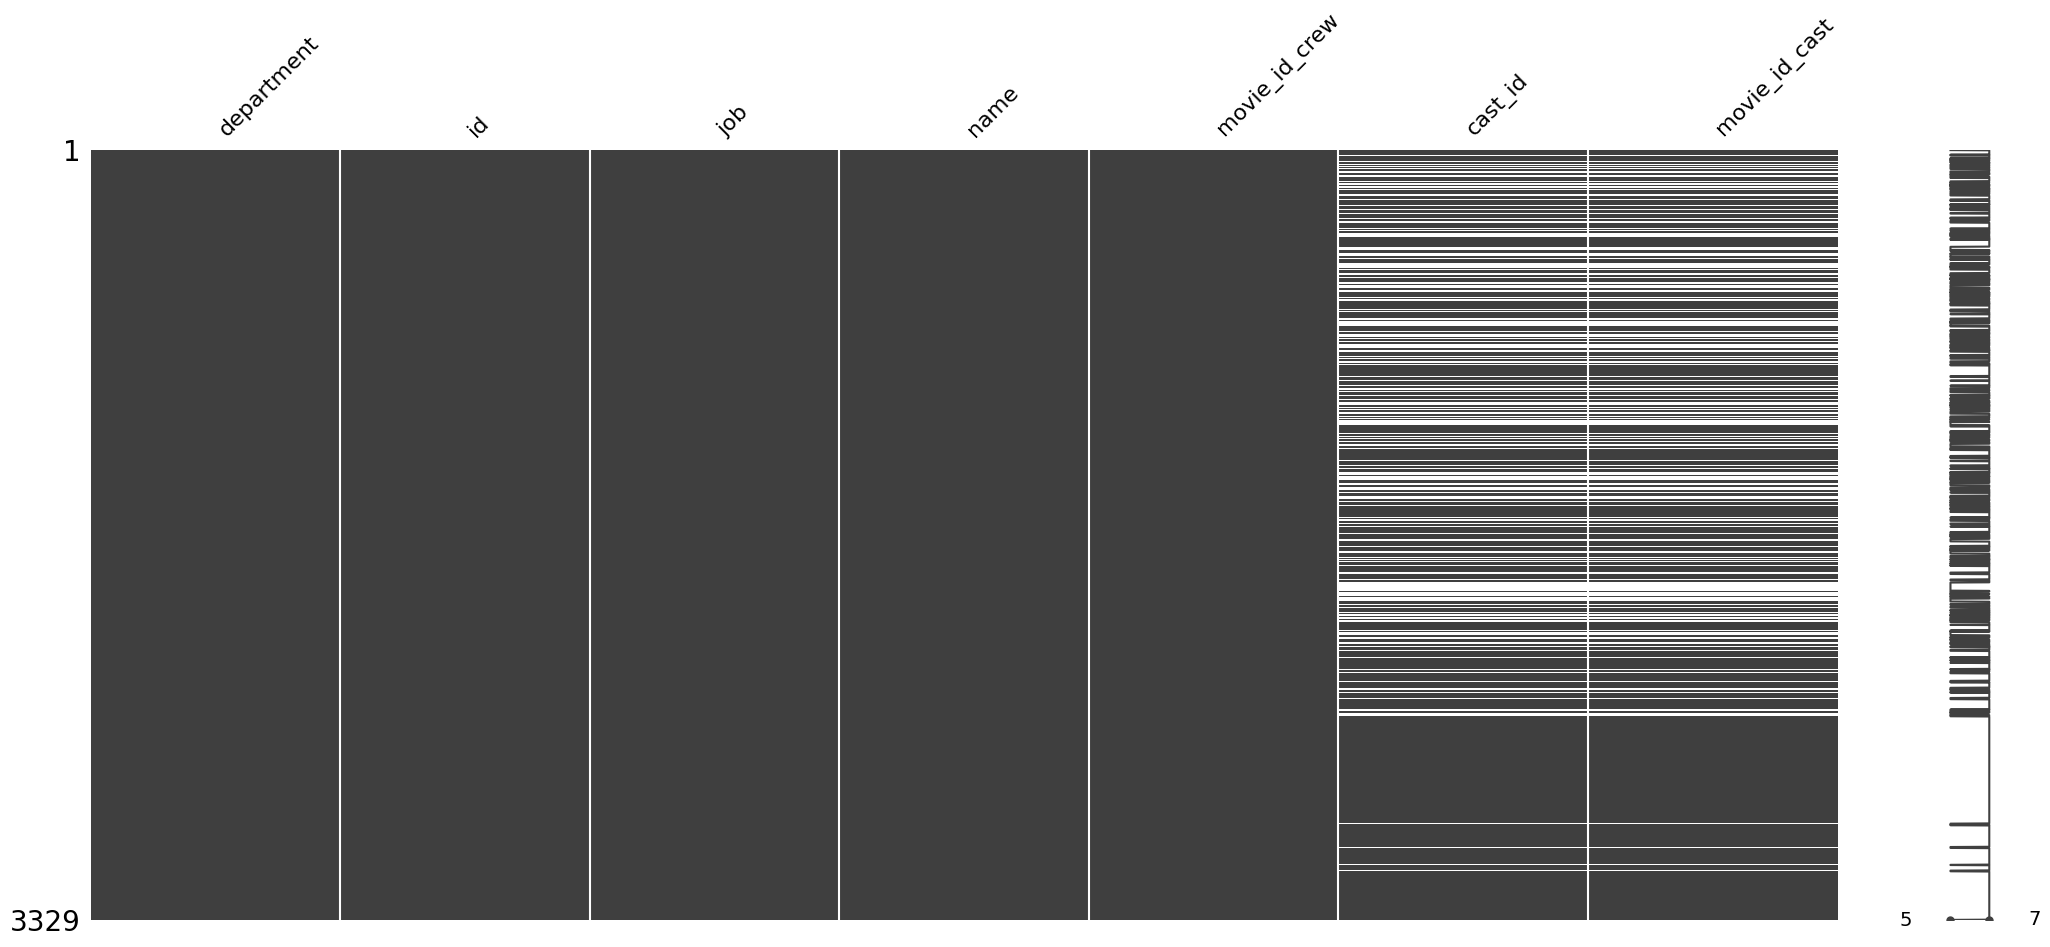

In [43]:
msno.matrix(director_merged_info)

In [44]:
director_merged_info.shape

(3329, 7)

In [45]:
director_merged_info_sin_na = director_merged_info.dropna()

In [46]:
director_merged_info_sin_na.shape

(2404, 7)

In [47]:
list_cols_int = ['id','movie_id_crew','cast_id','movie_id_cast']
for element in list_cols_int:
    director_merged_info_sin_na.loc[:, list_cols_int] = director_merged_info_sin_na[list_cols_int].astype(int)
    

In [48]:
director_merged_info_sin_na.head(5)

,department,id,job,name,movie_id_crew,cast_id,movie_id_cast
1,Directing,5281,Director,Spike Lee,8844,4.0,27793.0
2,Directing,5281,Director,Spike Lee,8844,21.0,28732.0
3,Directing,5281,Director,Spike Lee,8844,4.0,7984.0
4,Directing,5281,Director,Spike Lee,8844,8.0,19052.0
5,Directing,3092,Director,Diane Keaton,15602,2.0,8844.0


In [49]:
director_merged_info_sin_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2404 entries, 1 to 3326
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     2404 non-null   object 
 1   id             2404 non-null   int64  
 2   job            2404 non-null   object 
 3   name           2404 non-null   object 
 4   movie_id_crew  2404 non-null   int64  
 5   cast_id        2404 non-null   float64
 6   movie_id_cast  2404 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 150.2+ KB


<Axes: >

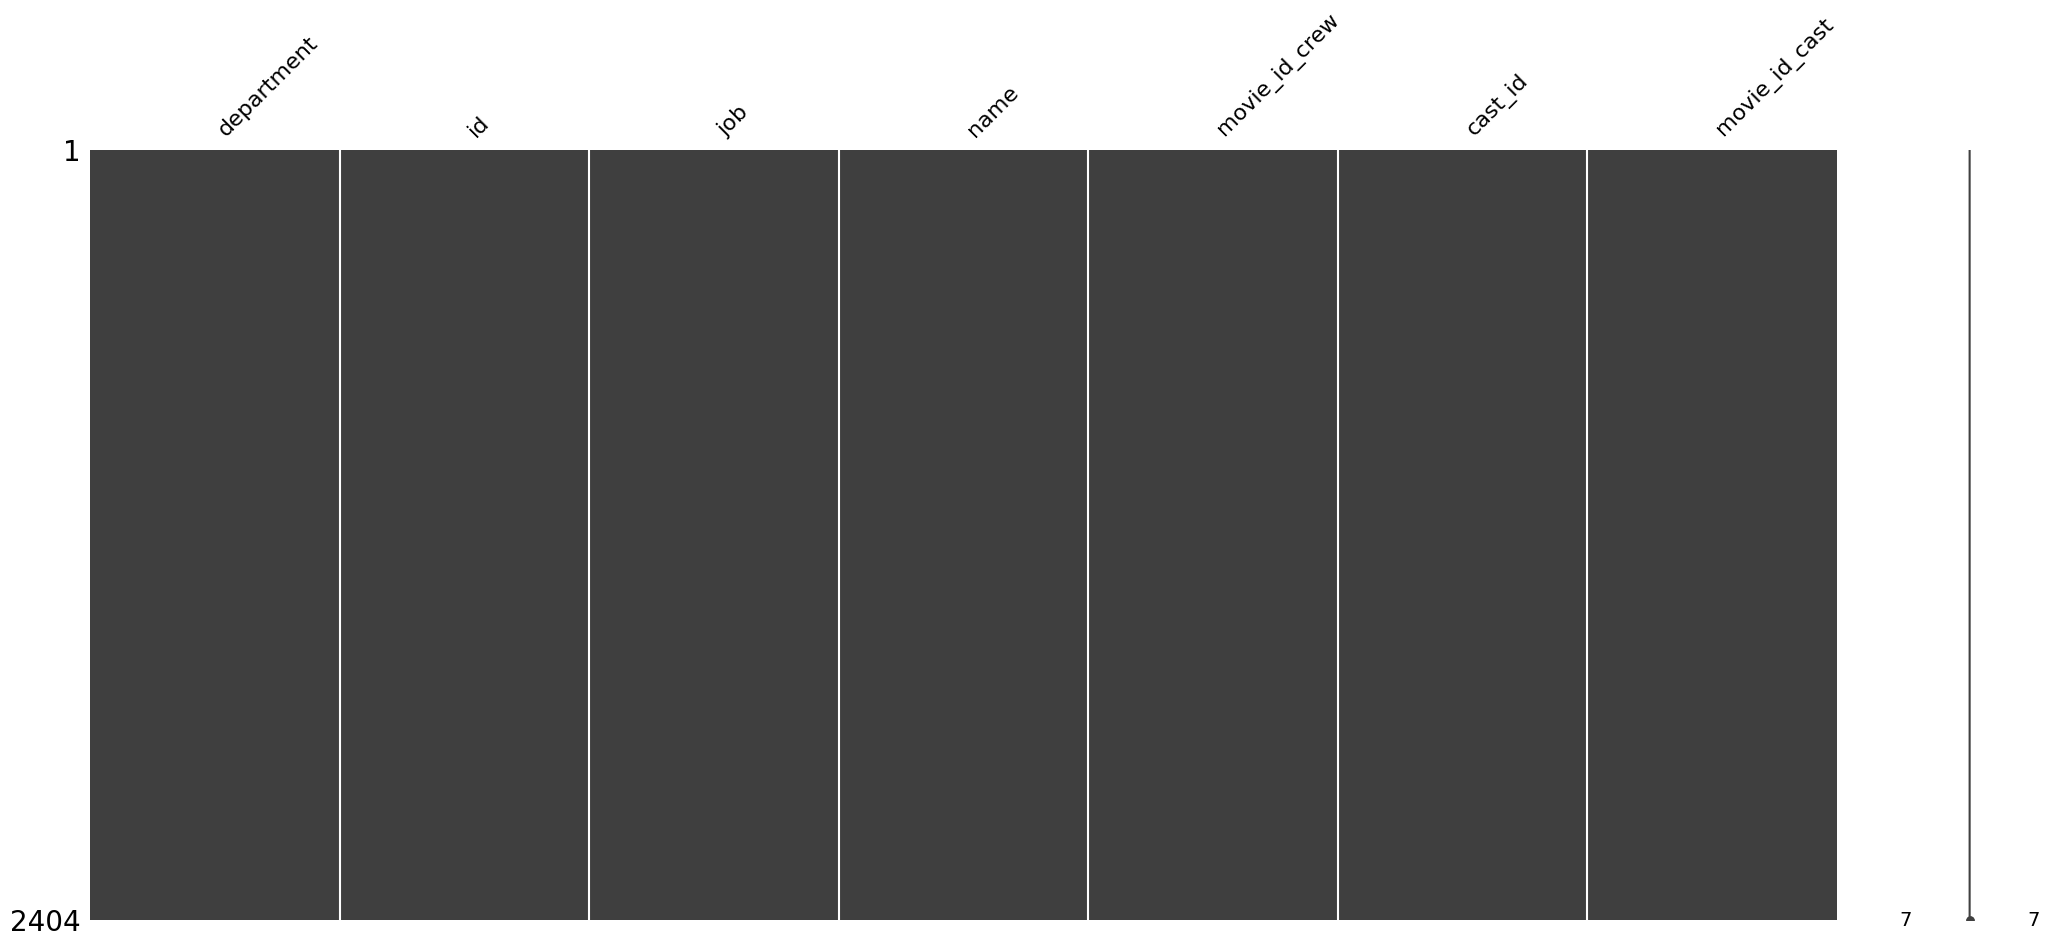

In [50]:
msno.matrix(director_merged_info_sin_na)

### Guardo pickle: director_merged_info

In [51]:
# Guardar el DataFrame en formato pickle
director_merged_info_sin_na.to_pickle('../../Datasets Cleaned & light/director_merged_info.pkl')